In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('Crop_recommendation.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
#  STEP 3: Basic EDA
print("\nDataset Info:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Checking for missing values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Class Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate  

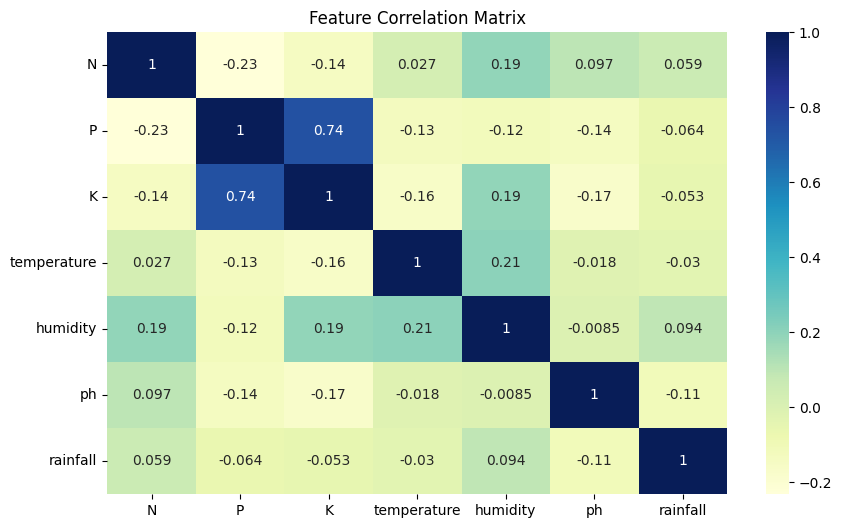

In [16]:
# Visualizing feature correlations (exclude label column)
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Matrix')
plt.show()



In [17]:
#  STEP 4: Feature-Target Split
X = df.drop('label', axis=1)
y = df['label']

#  STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  STEP 6: Feature Scaling (Optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
#  STEP 7: Train Models

# 1. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


In [19]:
#  STEP 8: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("KNN", y_test, knn_pred)


----- Decision Tree -----
Accuracy: 0.9863636363636363
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 

In [20]:
#  STEP 9: GridSearchCV for Random Forest (Optional)
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}
grid_rf = GridSearchCV(RandomForestClassifier(), params, cv=3)
grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test_scaled)
evaluate_model("Tuned Random Forest", y_test, best_rf_pred)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}
----- Tuned Random Forest -----
Accuracy: 0.9931818181818182
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

In [21]:
#  STEP 10: Final Prediction Function
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    data_scaled = scaler.transform(data)
    prediction = best_rf.predict(data_scaled)
    return prediction[0]

# Example usage:
print("Recommended Crop:", recommend_crop(90, 42, 43, 20.5, 80, 6.5, 100))


Recommended Crop: rice


In [22]:
#STEP 11: Save the Model (Optional)
import joblib
joblib.dump(best_rf, "crop_recommender_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']